In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True 

from openff.toolkit import ForceField, Molecule, unit

In [2]:
ligand = Molecule.from_smiles("[O-]S(=O)(=O)[O-]")

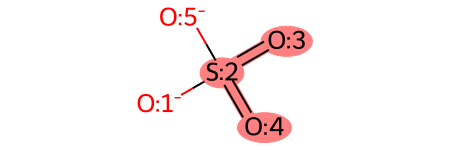

In [8]:
rdmol = Chem.MolFromSmiles(ligand.to_smiles(mapped=True))
rdmol.__sssAtoms = [2, 1, 3]
rdmol

In [6]:
ff = ForceField("../../forcefields/fb-fit-v1-single-mean-k100.offxml")
angles = ff.label_molecules(ligand.to_topology())[0]["Angles"]
for indices, parameter in angles.items():
    elements = [ligand.atoms[i].symbol for i in indices]
    label = "-".join(f"{el}{i + 1}" for el, i in zip(elements, indices))
    print(f"{label}  |  {parameter.id} -- {parameter.angle}, {parameter.k}")


O1-S2-O3  |  a32 -- 108.971569825 degree, 125.7180762164 kilocalorie_per_mole / radian ** 2
O1-S2-O4  |  a32 -- 108.971569825 degree, 125.7180762164 kilocalorie_per_mole / radian ** 2
O1-S2-O5  |  a32 -- 108.971569825 degree, 125.7180762164 kilocalorie_per_mole / radian ** 2
O3-S2-O4  |  a31 -- 118.6674115559 degree, 207.3293355392 kilocalorie_per_mole / radian ** 2
O3-S2-O5  |  a32 -- 108.971569825 degree, 125.7180762164 kilocalorie_per_mole / radian ** 2
O4-S2-O5  |  a32 -- 108.971569825 degree, 125.7180762164 kilocalorie_per_mole / radian ** 2
